In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [2]:
# Шаг 1: Загрузка данных
data = pd.read_csv('abalone.csv')

In [3]:
# Шаг 2: Преобразование признака Sex в числовой
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
# Шаг 3: Разделение данных на признаки и целевую переменную
X = data.drop('Rings', axis=1)
y = data['Rings']

In [5]:
# Шаг 4: Обучение случайного леса
def train_model(n_estimators):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    y_pred = cross_val_predict(model, X, y, cv=kf)
    r2 = r2_score(y, y_pred)
    return n_estimators, r2

results = Parallel(n_jobs=-1)(delayed(train_model)(n) for n in range(1, 51))

n_estimators_values, r2_scores = zip(*results)

In [6]:
# Шаг 5: Определение минимального количества деревьев
min_trees_for_quality = next(n for n, r2 in results if r2 > 0.52)
print(f'Минимальное количество деревьев с качеством > 0.52: {min_trees_for_quality}')

Минимальное количество деревьев с качеством > 0.52: 19


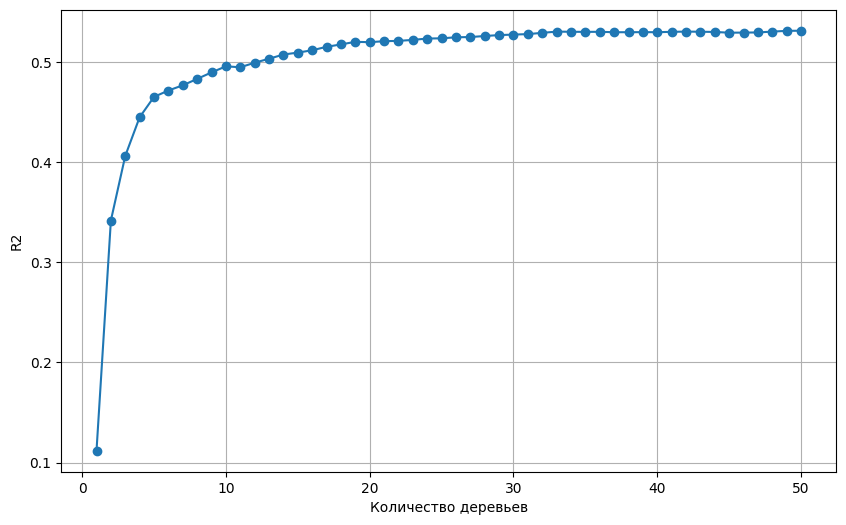

In [7]:
# Шаг 6: Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, r2_scores, marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('R2')
plt.grid(True)
plt.show()